# process spectra for AuxTel with new spectractor (May 2022) for particular config for Hologram

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : May 20th 2022

- version v3 : Work with exposure butlen gen3


- Config H:

       
       After pull request from Jeremy on git-branch issue-auxteltarget
       
       pour faire simple, je propose une pull request d'une branche qui contient mes réglages vers ta branche issue-auxteltarget :

       https://github.com/LSSTDESC/Spectractor/pull/95
       

This notebook is to help for finding the position of order 0

CCIN2P3:

- works with kernels **anaconda3_auxtel** (with libradtran) and **anaconda3_auxtel_v2** (no libradtran)
- works with kernel **python 3** locally 




- Creation May 26th 2022

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
print(sys.path)

['/Users/sylvie/MacOSX/GitHub/LSST/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_05', '/Users/sylvie/anaconda3/lib/python39.zip', '/Users/sylvie/anaconda3/lib/python3.9', '/Users/sylvie/anaconda3/lib/python3.9/lib-dynload', '', '/Users/sylvie/anaconda3/lib/python3.9/site-packages', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/iminuit-2.11.2-py3.9-macosx-10.9-x86_64.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/schwimmbad-0.3.2-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/emcee-3.1.1-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/astroquery-0.4.6-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/docopt-0.6.2-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/pytz-2022.1-py3.9.egg', '/Users/sylvie/anaconda3/lib/python3.9/site-packages/urllib3-1.26.

In [3]:
all_paths_to_remove = ['/opt/conda/lib/python3.8/site-packages','/pbs/home/d/dagoret/.local/lib/python3.8/site-packages']

for path_to_remove in all_paths_to_remove:
    if path_to_remove in sys.path:
        print(f"remove {path_to_remove} from sys.path")
        sys.path.remove(path_to_remove)

In [4]:
sys.path

['/Users/sylvie/MacOSX/GitHub/LSST/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_05',
 '/Users/sylvie/anaconda3/lib/python39.zip',
 '/Users/sylvie/anaconda3/lib/python3.9',
 '/Users/sylvie/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/iminuit-2.11.2-py3.9-macosx-10.9-x86_64.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/schwimmbad-0.3.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/emcee-3.1.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/astroquery-0.4.6-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/docopt-0.6.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/pytz-2022.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
sys.path

['/Users/sylvie/MacOSX/GitHub/LSST/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_05',
 '/Users/sylvie/anaconda3/lib/python39.zip',
 '/Users/sylvie/anaconda3/lib/python3.9',
 '/Users/sylvie/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/iminuit-2.11.2-py3.9-macosx-10.9-x86_64.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/schwimmbad-0.3.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/emcee-3.1.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/astroquery-0.4.6-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/docopt-0.6.2-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages/pytz-2022.1-py3.9.egg',
 '/Users/sylvie/anaconda3/lib/python3.9/site-packages

In [7]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/Users/sylvie/anaconda3/bin/python
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


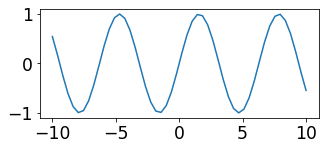

In [8]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               


In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.11.2'

In [11]:
from astropy.io import fits
from astropy.coordinates import Angle
from astropy import units as u
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [12]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

In [13]:
from distutils.dir_util import copy_tree
import shutil

# Configuration

## Config for the notebook

In [14]:
version="v5.0"  # version of flipping
# create output directories if not exist and clean existing files
FLAG_MANAGE_OUTPUT_SPECTRACTOR=True
# allow to run reconstruction with Spectractor
FLAG_GO_FOR_RECONSTRUCTION_WTH_SPECTRACTOR=True
FLAG_RUNWITHEXCEPTIONS = False

## Configuration for Spectractor

In [15]:
print("List of configuration files available : ",os.listdir("config"))

List of configuration files available :  ['auxtel_config_holo_DECONVOLUTION_FFM.ini', 'auxtel_config_holo_DECONVOLUTION_PSF2D.ini', 'auxtel_config_ronchi_DECONVOLUTION_PSF2D.ini']


In [16]:
# Choose the config filename
list_of_spectractorconfigfiles= ['auxtel_config_holo_DECONVOLUTION_FFM.ini', 'auxtel_config_holo_DECONVOLUTION_PSF2D.ini']
config_idx = 1
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
#configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]
configdir = "config_" + (list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_")[-1]).split(".") [0]

In [17]:
configfilename

'./config/auxtel_config_holo_DECONVOLUTION_PSF2D.ini'

In [18]:
configdir

'config_DECONVOLUTION_PSF2D'

# Exposure config

In [19]:
# path index for each month
DATE="20220316"
filterdispersername = "empty~holo4_003"
imagemode = "postISRCCD"
#imagemode = "unflattened"

In [20]:
disperser_label = filterdispersername.split("~")[-1]

## Paths

In [21]:
# select if we run at CC or not (locally) 
# /sps/lsst/groups/auxtel/data/2022/holo/20220317
HOSTCC=False

In [22]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)

else:
    path_auxtel="/Users/sylvie/DATA/AuxTelData2022"
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)


In [23]:
path_images

'/Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316'

In [24]:
path_topoutput_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D'

In [25]:
path_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316'

# Utility Functions

In [26]:
def is_nan(x):
    return (x != x)

# Logbook for input file selection

- the logbook contains all input image path and possibily the order 0 position

In [27]:
!ls logbooks

auxtellogbook_BG40~holo4_003_20211104_v5.0.csv
auxtellogbook_BG40~holo4_003_20211104_v5.0.xlsx
auxtellogbook_FELH0600~holo4_003_20211104_v5.0.csv
auxtellogbook_FELH0600~holo4_003_20211104_v5.0.xlsx
auxtellogbook_empty~holo4_003_20211104_v5.0.csv
auxtellogbook_empty~holo4_003_20211104_v5.0.xlsx
auxtellogbook_empty~holo4_003_20220316_v5.0.csv
auxtellogbook_empty~holo4_003_20220316_v5.0.xlsx
auxtellogbook_empty~holo4_003_20220317_v5.0.csv
auxtellogbook_empty~holo4_003_20220317_v5.0.xlsx
auxtellogbook_empty~ronchi170lpmm_20220316_v5.0.csv
auxtellogbook_empty~ronchi170lpmm_20220316_v5.0.xlsx
auxtellogbook_empty~ronchi170lpmm_20220317_v5.0.csv
auxtellogbook_empty~ronchi170lpmm_20220317_v5.0.xlsx


In [28]:
filename_logbook='logbooks/auxtellogbook_'+filterdispersername+"_"+DATE+'_' + version+'.csv'

In [29]:
filename_logbook

'logbooks/auxtellogbook_empty~holo4_003_20220316_v5.0.csv'

In [30]:
df=pd.read_csv(filename_logbook,index_col=0)

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
# show the list of input files from the logbook to select the file index in the logbook
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2022-03-17T01:59:37.776,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600330_postisrccd.fits,330,eta dor,empty_1,holo4_003,1.385409,20.0,...,10.6,44.0,7.2,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2022-03-17T02:00:10.693,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600331_postisrccd.fits,331,eta dor,empty_1,holo4_003,1.386483,20.0,...,10.6,44.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2022-03-17T02:03:04.275,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600337_postisrccd.fits,337,eta dor,empty_1,holo4_003,1.392269,20.0,...,10.6,43.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2022-03-17T02:03:37.365,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600338_postisrccd.fits,338,eta dor,empty_1,holo4_003,1.393378,20.0,...,10.6,43.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2022-03-17T02:06:31.026,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600344_postisrccd.fits,344,eta dor,empty_1,holo4_003,1.399309,20.0,...,10.5,43.0,8.2,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2022-03-17T02:07:03.927,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600345_postisrccd.fits,345,eta dor,empty_1,holo4_003,1.400449,20.0,...,10.5,43.0,7.6,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2022-03-17T02:11:00.681,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600351_postisrccd.fits,351,HD111980,empty_1,holo4_003,1.647734,20.0,...,10.5,43.0,13.1,300.0,1700.0,NaN,NaN,,1.0,1.0
7,7,2022-03-17T02:11:33.581,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600352_postisrccd.fits,352,HD111980,empty_1,holo4_003,1.643280,20.0,...,10.5,43.0,13.1,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2022-03-17T02:14:30.261,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600358_postisrccd.fits,358,HD111980,empty_1,holo4_003,1.619945,20.0,...,10.5,43.0,12.1,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2022-03-17T02:15:03.181,/sps/lsst/groups/auxtel/data/2022/empty~holo4_...,exposure_2022031600359_postisrccd.fits,359,HD111980,empty_1,holo4_003,1.615702,20.0,...,10.5,44.0,6.9,NaN,NaN,NaN,NaN,,NaN,NaN


# Selection of input file
- the input file is selected from the logbook list above

In [33]:
idx=1

In [34]:
print(df.iloc[idx]['file'])

exposure_2022031600331_postisrccd.fits


In [35]:
print(df.iloc[idx])

index                                                          1
date                                     2022-03-17T02:00:10.693
path           /sps/lsst/groups/auxtel/data/2022/empty~holo4_...
file                      exposure_2022031600331_postisrccd.fits
num                                                          331
object                                                   eta dor
filter                                                   empty_1
disperser                                              holo4_003
airmass                                                 1.386483
exposure                                                    20.0
focus                                                   0.041059
seeing                                                  0.921627
pressure                                                  743.55
temperature                                                 10.6
humidity                                                    44.0
windspd                  

In [36]:
myhome=os.getenv("HOME")

In [37]:
dir_images=path_images

In [38]:
dir_images

'/Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316'

In [39]:
filename_image=df['file'][idx]
filename_image

'exposure_2022031600331_postisrccd.fits'

In [40]:
target = df['object'][idx]
target

'eta dor'

## If order 0 position exists in logbook it is selected, otherwise put it by hand

In [41]:
# ## If order 0 position exists in logbook it is selected, otherwise put it by hand

x0=300
y0=1700

if 'Obj-posXpix' in df.columns and 'Obj-posYpix' in df.columns:
    thex0 = df['Obj-posXpix'][idx]
    if not is_nan(thex0):
        x0=thex0
    they0 = df['Obj-posYpix'][idx]
    if not is_nan(they0):
        y0=they0
    
if not is_nan(x0) and not is_nan(y0):

    print("Order 0 location from logbook : ({},{})".format(x0,y0))
else:
    print("NO Order 0 location from logbook ! ")      

print(f"guess (x0,y0) = ({x0},{y0})")


Order 0 location from logbook : (300,1700)
guess (x0,y0) = (300,1700)


## Spectractor Configuration 

- Usually the Spectractor configuration file is put in local dir **./config**


Ma suggestion, pour l'étude du centre optique via les scans des hologrammes, est de **mettre SPECTRACTOR_COMPUTE_ROTATION_ANGLE sur False** . 

Comme les angles ne sont pas très grands, si les marges du rectangle sont assez larges, réglables avec : 

    [background subtraction parameters] 
    # half transverse width of the signal rectangular window in pixels 
    PIXWIDTH_SIGNAL = 40 

alors le spectrogramme devrait tenir dans une boite rectangulaire même sans rotation de l'image. **L'important est de garder SPECTRACTOR_DECONVOLUTION_FFM à True car c'est lui qui te donnera l'angle de l'axe de dispersion ajusté sur les données, dont la valeur sera dans le mot clé ROTANGLE du header de sortie**. 


In [42]:
rootfilename = filename_image.split(".")[0]
rootfilename_split =  rootfilename.split("_") 
filenumberdir = rootfilename_split[1] 

In [43]:
path_output_spectractor

'/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316'

In [44]:
configdir

'config_DECONVOLUTION_PSF2D'

In [45]:

# Fullfilename
filename=os.path.join(dir_images,filename_image)


# subdirectory
#subdir=filename_image.split(".")[0]
subdir=filenumberdir

# final output directory (where results will be copied to be backed up at the end)
finalpath_output_spectractor=os.path.join(path_output_spectractor,subdir)


# local directories to put spectra and plots
if configdir =="":
    output_directory="./outputs_process_holo"
    output_figures="figures_process_holo"
else:
    output_directory = "./outputs_process_holo_" + configdir
    output_figures   = "./figures_process_holo_" + configdir
    


guess = [300,1700]

# configuration

config=configfilename    
target=df.iloc[idx]["object"]

In [46]:
print(f"finalpath_output_spectractor = {finalpath_output_spectractor}")
print(f"output_directory = {output_directory}")
print(f"output_figures = {output_figures}")
print(f"config filename = {config}")

finalpath_output_spectractor = /Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331
output_directory = ./outputs_process_holo_config_DECONVOLUTION_PSF2D
output_figures = ./figures_process_holo_config_DECONVOLUTION_PSF2D
config filename = ./config/auxtel_config_holo_DECONVOLUTION_PSF2D.ini


In [47]:
def cleandir(path):
    if os.path.isdir(path):
        files=os.listdir(path)
        if len(files) > 0:
            for f in files:
                if os.path.isdir(os.path.join(path,f)):
                    if f==".ipynb_checkpoints":
                        shutil.rmtree(os.path.join(path,f))
                    else:
                        print(" Cannot remove this directory {}".format(os.path.join(path,f)))
                else:
                    os.remove(os.path.join(path,f))

In [48]:
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
else:
    cleandir(output_directory)
 
# manage subdirs spectrum/ and plots/
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)
else:
    cleandir(output_figures)

# Configuration of the Spectractor running mode

In [49]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH=output_figures

In [50]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [51]:
target

'eta dor'

## Load the image in the new image file with Spectractor

In [52]:
image=Image(file_name=filename, disperser_label=disperser_label, config=config)

No rebinning: parameters.REBIN is forced to 1.
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC ... PM_ERR_MAJA PM_ERR_MINA PM_ERR_ANGLE  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                     ...   mas / yr    mas / yr      deg                                
----------- ------------- ------------- ------- -------- ... ----------- ----------- ------------ --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635      14       14 ...       0.066       0.061           90 0.0000590                1


In [53]:
image.data.shape

(4072, 4000)

## Show relevant parameters

In [55]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH=output_figures

In [57]:
image.header["FILTER"]

'empty_1'

In [58]:
image.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2022-03-17T01:59:56.544'                                             
DATE-OBS= '2022-03-17T01:59:56.544'                                             
DATE-BEG= '2022-03-17T02:00:10.693'                                             
DATE-END= '2022-03-17T02:00:30.923'                                             
MJD     =     59655.0832933353                                                  
MJD-OBS =     59655.0834570961                                                  
MJD-BEG =     59655.08345709

# Plot image and find the target position

- this image plotting is used to find the order 0 location to be set in logbook

- for the moment this is humanly done

## Load the new image file with Spectractor

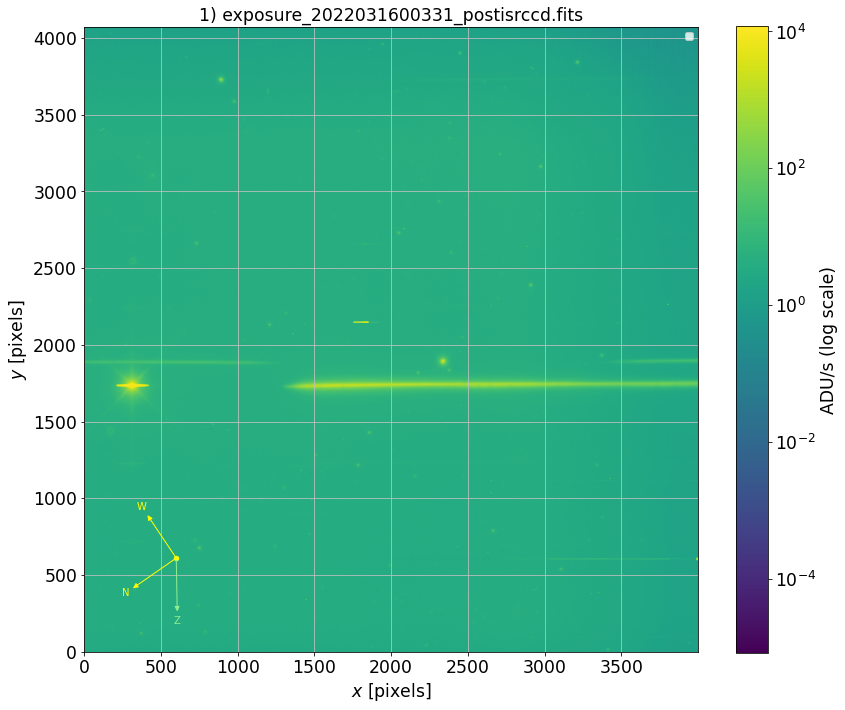

In [59]:
title="{}) {}".format(idx,filename_image)
image.plot_image(figsize=(12, 10),scale="log",title=title)

- note now the position are written in the make_logbook.ipynb notebook

## Set the 0th order location to be provided to Spectractor

In [60]:
filename_image

'exposure_2022031600331_postisrccd.fits'

## Let Spectractor find the location of the 0th order

2022-05-27 16:28:44  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- ------------------- -------------------
    6.798547405049312 0.05048619956994287 0.10936732041201457
2022-05-27 16:28:45  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 18 iterations because the relative change of cost is below ftol=1.25e-05.


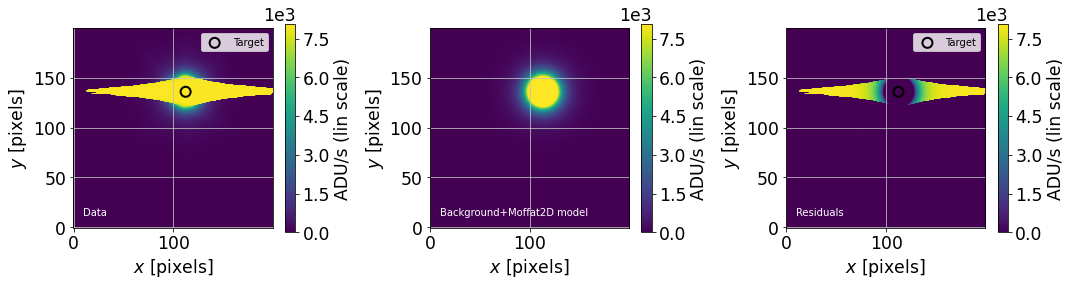

2022-05-27 16:28:46  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


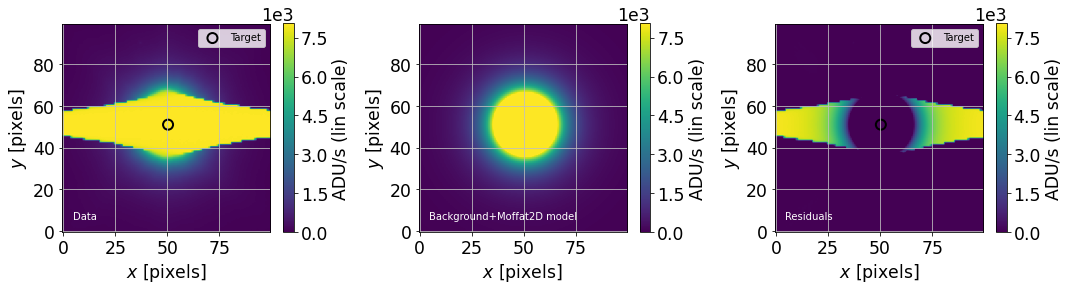

In [62]:

parameters.VERBOSE = True
parameters.DEBUG = True
#x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)
x1, y1 = find_target(image, guess,rotated=False)

In [63]:
print(x1,y1)

312.3612436451685 1735.98077912846


## Check the location of 0th order and Analysis of the quality of its focus

In [64]:
if x1>100:
    WID=100
else:
    WID=50
    

thumbnail=np.copy(image.data[int(y1)-WID:int(y1)+WID,int(x1)-WID:int(x1)+WID])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-WID,int(x1)+WID,len(thumbnail_x))
yy=np.linspace(int(y1)-WID,int(y1)+WID,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)
        

In [65]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [66]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [67]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [68]:
kurtosis_test_prob=kurtosistest(thumbnail,axis=None).pvalue
skew_test_prob=skewtest(thumbnail,axis=None).pvalue
normal_test_prob=normaltest(thumbnail,axis=None).pvalue

In [69]:
kurtosis_test_val=kurtosistest(thumbnail,axis=None).statistic
skew_test_val=skewtest(thumbnail,axis=None).statistic
normal_test_val=normaltest(thumbnail,axis=None).statistic

In [70]:
kurtosis_test_prob_x=kurtosistest(thumbnail_x).pvalue
skew_test_prob_x=skewtest(thumbnail_x).pvalue
normal_test_prob_x=normaltest(thumbnail_x).pvalue

In [71]:
kurtosis_test_prob_y=kurtosistest(thumbnail_y).pvalue
skew_test_prob_y=skewtest(thumbnail_y).pvalue
normal_test_prob_y=normaltest(thumbnail_y).pvalue

In [72]:
skew_str='\n'.join((
    r'skew     : Sk0 = {:3.3f}'.format(s0),
    r'             : Skx = {:3.3f}'.format(sx),
    r'             : Sky = {:3.3f}'.format(sy),
    r'             : p_test   = {:3.3e}'.format(skew_test_prob),
    r'             : p_test_x = {:3.3e}'.format(skew_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(skew_test_prob_y)))

In [73]:
kurt_str='\n'.join((
    r'kurtosis : K0 = {:3.3f}'.format(k0),
    r'             : Kx = {:3.3f}'.format(kx),
    r'             : Ky = {:3.3f}'.format(ky),
    r'             : p_test   = {:3.3e}'.format(kurtosis_test_prob),
    r'             : p_test_x = {:3.3e}'.format(kurtosis_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(kurtosis_test_prob_y)))

In [74]:
norm_str='\n'.join((
    r'normal  : p_test   = {:3.3e}'.format(normal_test_prob),
    r'             : p_test_x = {:3.3e}'.format(normal_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(normal_test_prob_y)))

In [75]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [76]:
#matplotlib.pyplot.hist(x, 
#                       bins=10, 
#                       range=None, 
#                       normed=False, 
#                       weights=None, 
#                       cumulative=False, 
#                       bottom=None, 
#                       histtype=u'bar', 
#                       align=u'mid', 
#                       orientation=u'vertical', 
#                       rwidth=None, 
#                       log=False, 
#                       color=None, 
#                       label=None, 
#                       stacked=False, 
#                       hold=None, 
#                       **kwargs)

Text(0.5, 0.98, '1) exposure_2022031600331_postisrccd.fits')

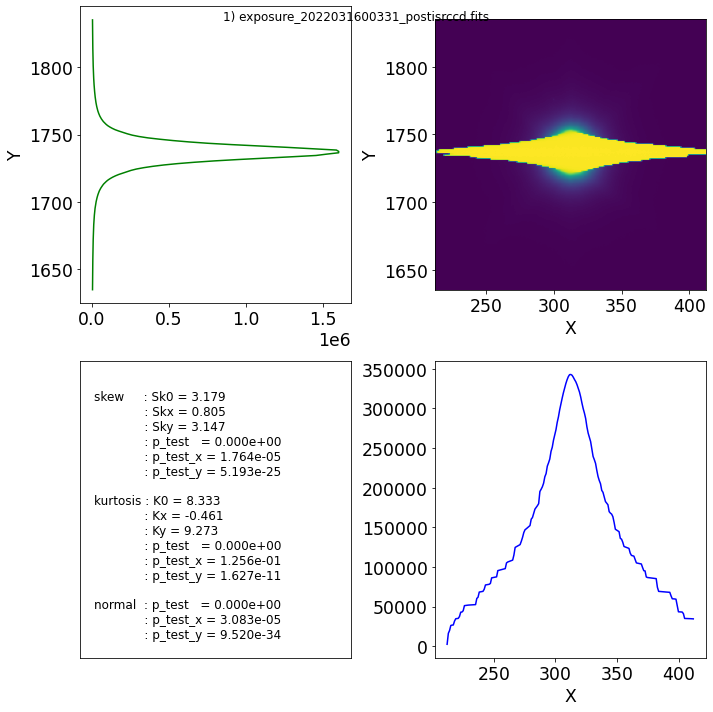

In [77]:
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-WID,int(x1)+WID,int(y1)-WID,int(y1)+WID))
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax=fig.add_subplot(221)
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)
#ax.plot(yy,thumbnail_y,"g",rotation=u'vertical')
ax.plot(-yy,thumbnail_y,"g",transform= rot + base)
ax.set_ylabel("Y")

ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()

ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.55, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.2, norm_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
plt.suptitle(title)

In [78]:
# Usually stop here if one just want to get the 0th order location
if not FLAG_GO_FOR_RECONSTRUCTION_WTH_SPECTRACTOR:
    assert False
else:
    assert True

# Go for spectrum reconstruction

In [79]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [80]:
filename

'/Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316/exposure_2022031600331_postisrccd.fits'

In [81]:
output_directory

'./outputs_process_holo_config_DECONVOLUTION_PSF2D'

2022-05-27 16:29:20  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2022-05-27 16:29:20  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2022/data/2022/empty~holo4_003/20220316/exposure_2022031600331_postisrccd.fits...


No rebinning: parameters.REBIN is forced to 1.
Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: pipeline
x spectractor_fit_target_centroid: fit	=> parameters.SPECTRACTOR_FIT_TARGET_CENTROID: fit	 <class 'str'>
x spectractor_compute_rotation_angle: disperser	=> parameters.SPECTRACTOR_COMPUTE_ROTATION_ANGLE: disperser	 <class 'str'>
x spectractor_deconvolution_psf2d: True	=> parameters.SPECTRACTOR_DECONVOLUTION_PSF2D: True	 <class 'bool'>
x spectractor_deconvolution_ffm: False	=> parameters.SPECTRACTOR_DECONVOLUTION_FFM: False	 <class 'bool'>
x spectractor_deconvolution_sigma_clip: 100	=> parameters.SPECTRACTOR_DE

2022-05-27 16:29:20  Image      load_AUXTEL_image    INFO   
	Image loaded
2022-05-27 16:29:20  Image      load_image           INFO   
	Loading disperser holo4_003...
2022-05-27 16:29:20  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/dispersers/holo4_003
2022-05-27 16:29:20  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2022-05-27 16:29:26  Star       load                 INFO   
	Simbad:
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC ... PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                     ...    mas / yr        deg                                 
----------- ------------- ------------- ------- -------- ... ------------- -------------- --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635      14

target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC ... PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                     ...    mas / yr        deg                                 
----------- ------------- ------------- ------- -------- ... ------------- -------------- --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635      14       14 ...         0.061             90 0.0000590                1


2022-05-27 16:29:27  Star       load_spectra         INFO   
	Loading /Users/sylvie/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/eta1dor_stis_002.fits


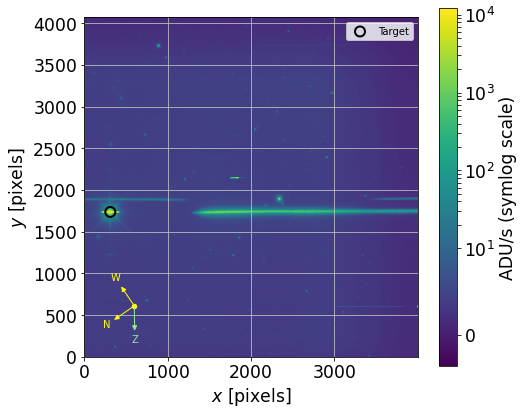

2022-05-27 16:29:31  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 312.36124365 1735.98077913]...
2022-05-27 16:29:31  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                 c1_0                  c0_1         
    ------------------ --------------------- ----------------------
    23.567952202594082 0.0022125041100363183 -0.0069311504754760965
2022-05-27 16:29:32  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the relative change of cost is below ftol=1.25e-05.


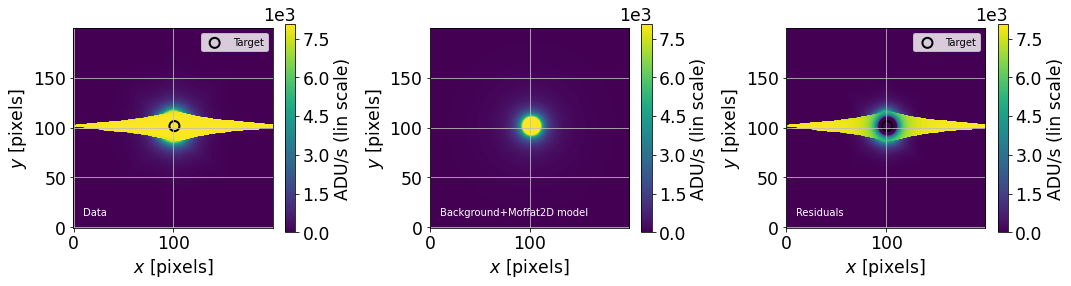

2022-05-27 16:29:33  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=5e-05.


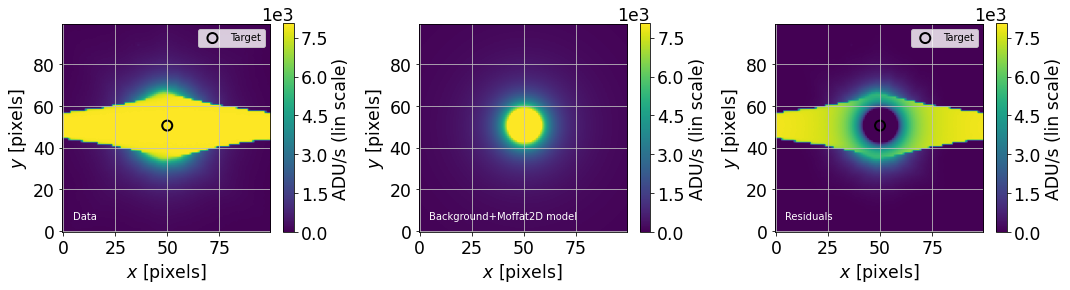

2022-05-27 16:29:33  Image      find_target          INFO   
	X,Y target position in pixels: 312.967,1736.533
2022-05-27 16:29:33  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.28 degree


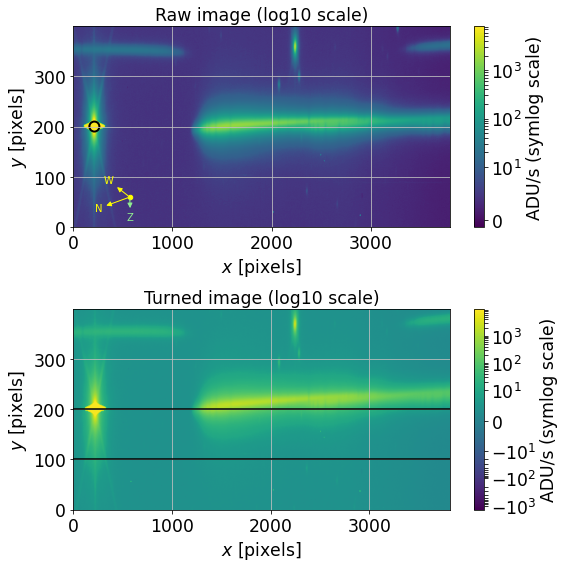

2022-05-27 16:29:44  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2022-05-27 16:29:44  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0              c0_1      
    ------------------ ------------------ ----------------
    1911.0813025934112 1.0417089417650283 2.15462842478811
2022-05-27 16:29:44  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: x_c has a null Jacobian; parameter is fixed at its last known current value (52.98864538078087).
2022-05-27 16:29:44  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: y_c has a null Jacobian; parameter is fixed at its last known current value (48.34501724931175).
2022-05-27 16:29:44  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma has a null Jacobian; parameter is fixed at its last known current value (10

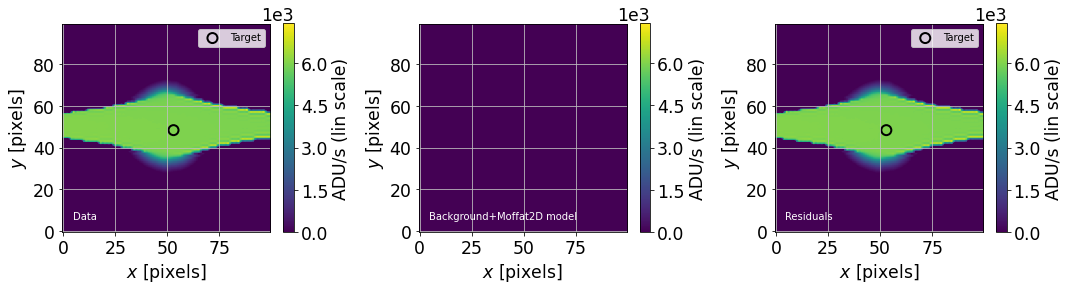

2022-05-27 16:29:45  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-1.1688098311424256e-08).
2022-05-27 16:29:45  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: x_c has a null Jacobian; parameter is fixed at its last known current value (23.18756726713828).
2022-05-27 16:29:45  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (27.450033701278343).
2022-05-27 16:29:45  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (100.0).
2022-05-27 16:29:45  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (15.587032611462089).
2022-05-27 16:29:45  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent te

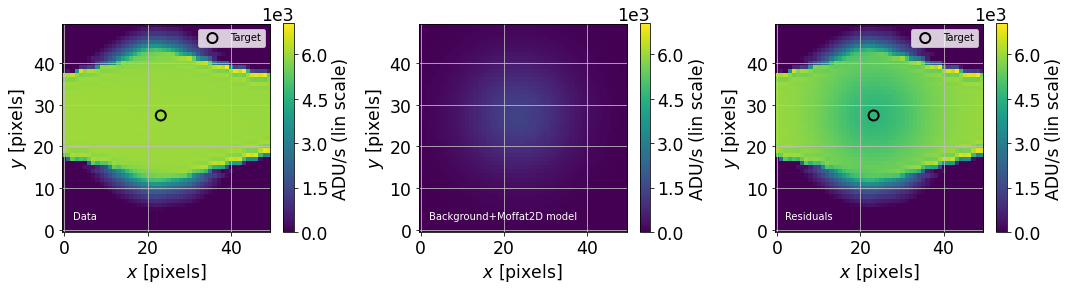

2022-05-27 16:29:45  Image      find_target          INFO   
	X,Y target position in pixels: 324.188,1737.450
2022-05-27 16:29:45  Spectrum   __init__             INFO   
	Spectrum info copied from image
2022-05-27 16:29:45  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*40 pixels and background from 140 to 180 pixels
2022-05-27 16:29:46  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1172:3476,1557:1917] (size (2304, 360))


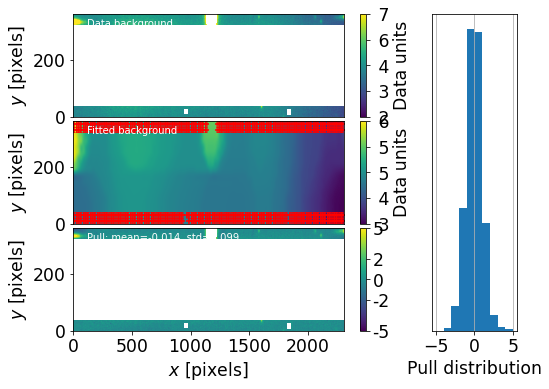

2022-05-27 16:29:49  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
/Users/sylvie/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/psf.py:707: RuntimeWarning: invalid value encountered in true_divide
  out = evaluate_moffat1d_unnormalized(y, amplitude, y_c, gamma, alpha) / norm


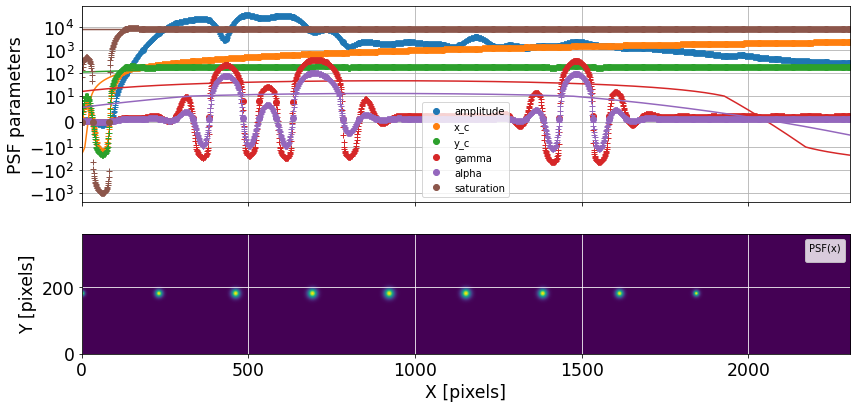

2022-05-27 16:29:55  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.7717e+08 initial chisq_red=1503.8
		 Line search: alpha_min=0.382 iter=3 funcalls=7
	Parameter shifts: [ 2.93086306  5.09206443  2.63782406 -0.04297772  8.55860693 40.33907878
 -1.74936967  0.24286458 12.028267  ]
	New parameters: [  0.72512245  -9.41128789 -26.57995915  45.58293305  63.23016056
 -12.65330059  11.4501071   17.13194738   2.67588587]
	Final cost=2.4589e+08 final chisq_red=1334.1 computed in 1.54s
2022-05-27 16:29:57  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=2.4589e+08 initial chisq_red=1334.1
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [10.2076251  17.86927773  9.76311671  2.51602412 13.79473954 58.84724306
 -5.91117331 -8.74600854  0.28541895]
	New parameters: [ 10.93274755   8.45798983 -16.81684244  48.09895717  77.0249001
  46.19394247   5.53893379   8.38593884   2.96130482]
	Final cost=1.2992e+08 final chi

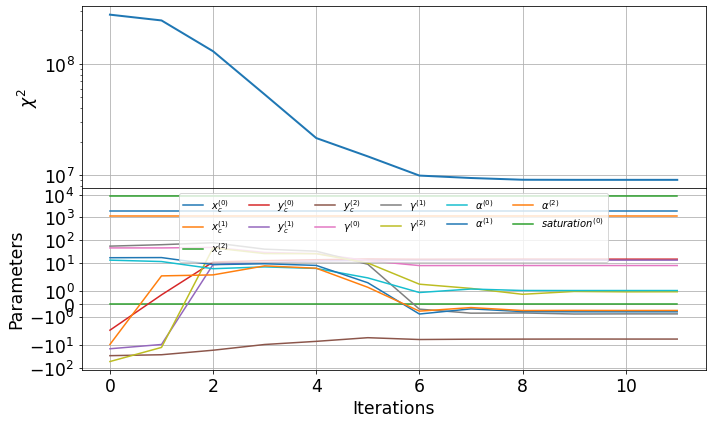

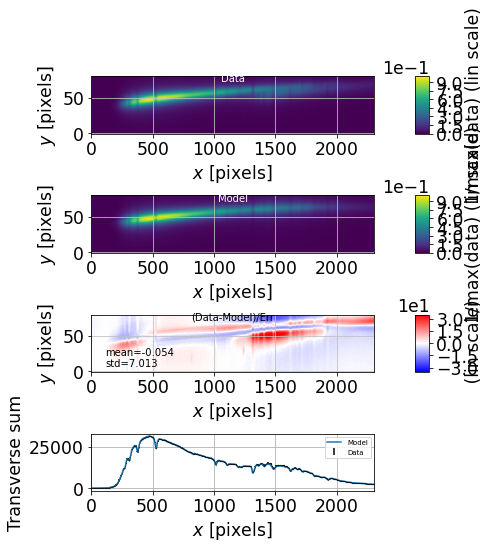

2022-05-27 16:30:11  ChromaticPSF1DFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_config_DECONVOLUTION_PSF2D/parameters_correlation.pdf.


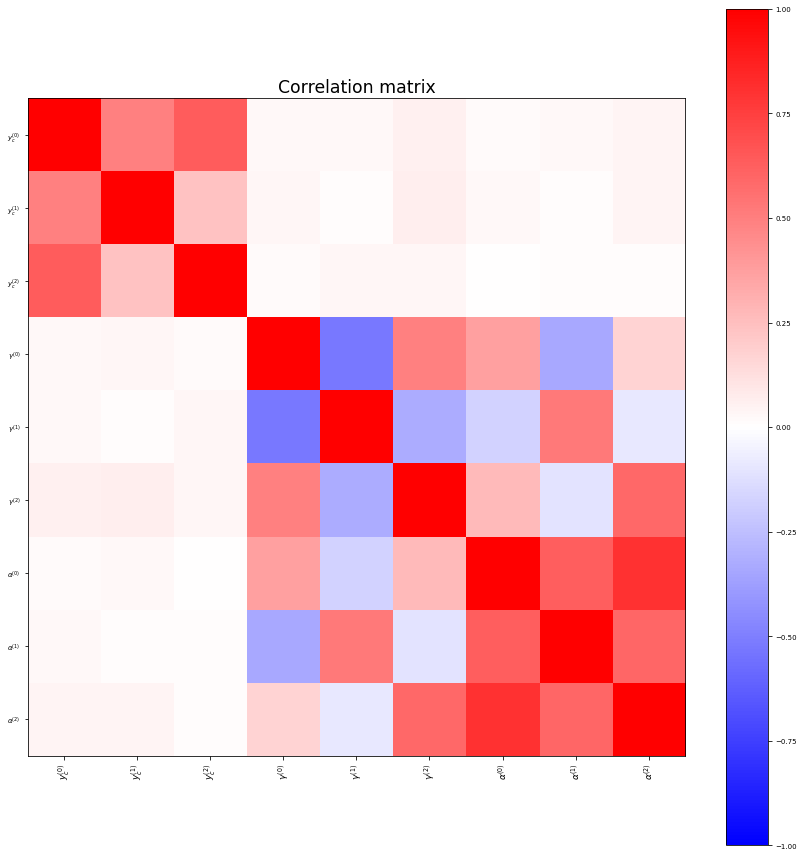

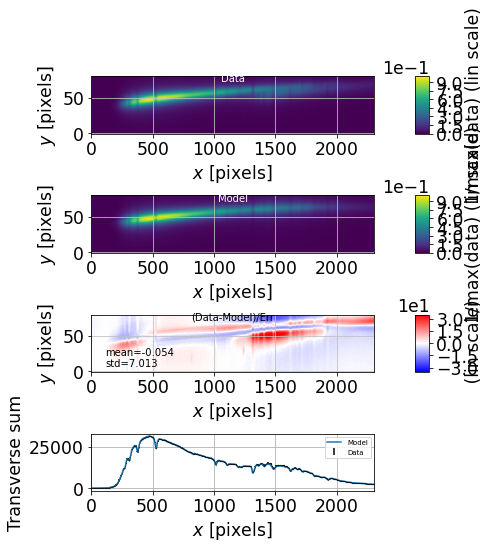

2022-05-27 16:30:16  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop raw image [1159:3463,1541:1913] (size (2304, 372))


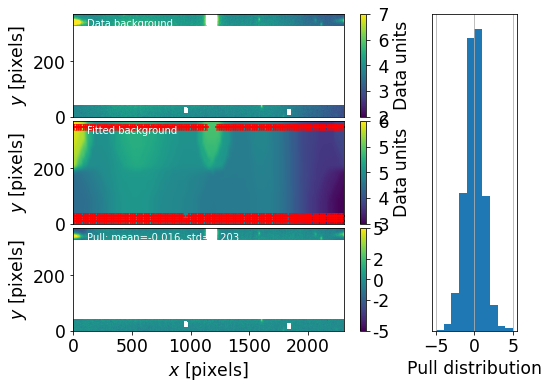

2022-05-27 16:30:19  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=4.367 ADU/s, RMS=0.638 ADU/s.
2022-05-27 16:30:19  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1159:3463,1541:1913] (size (2304, 372))
	New target position in spectrogram frame: [-846.0330667334925, 195.53338410970036]


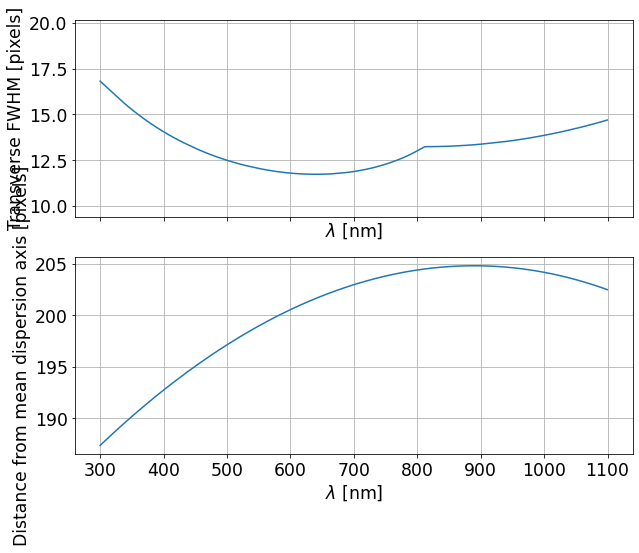

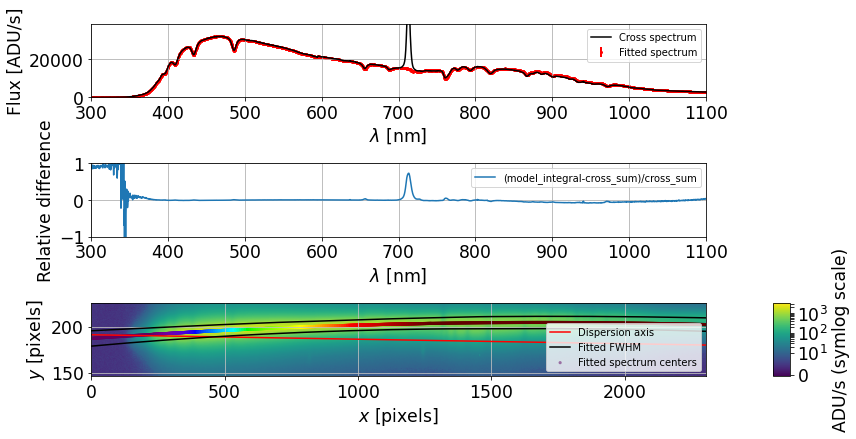

2022-05-27 16:30:24  spectractor.extractor.extractor run_spectrogram_deconvolution_psf2d INFO   
	Start ChromaticPSF polynomial fit with mode=2D and amplitude_priors_method=psf1d...
2022-05-27 16:35:10  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=9.841e+07 initial chisq_red=587.87
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-0.15164046  0.2392853   0.81094434 -4.13310361 -2.96427442 -1.60252409
  0.10465854 -0.12851087 -0.05025636]
	New parameters: [ 4.65442821  7.81765657 -4.61313599  3.52077817 -3.74930909 -0.63194104
  1.33795897 -0.4604286  -0.24036083]
	Final cost=5.6806e+07 final chisq_red=339.34 computed in 264.00s
2022-05-27 16:39:19  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=5.6806e+07 initial chisq_red=339.34
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [ 0.05498409  0.24807391 -0.60009051  2.52853362 -0.76807652 -1.7562555
  0.12537336 -0.37686881 -0.41489548]

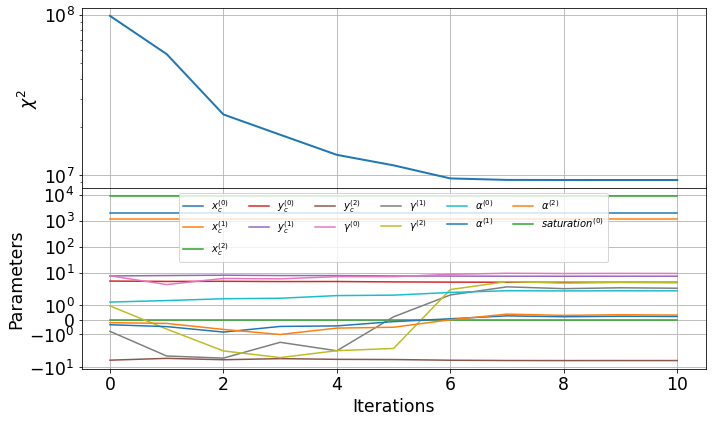

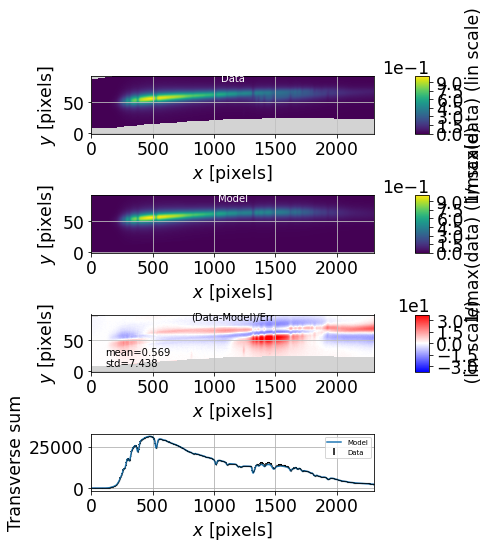

2022-05-27 17:33:04  ChromaticPSF2DFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_config_DECONVOLUTION_PSF2D/parameters_correlation.pdf.


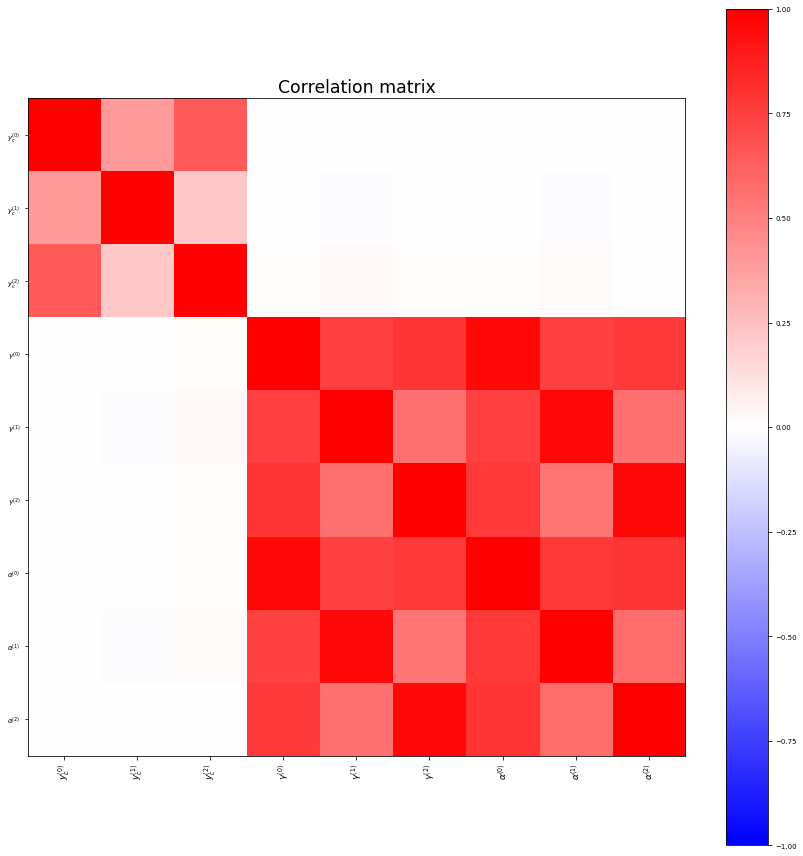

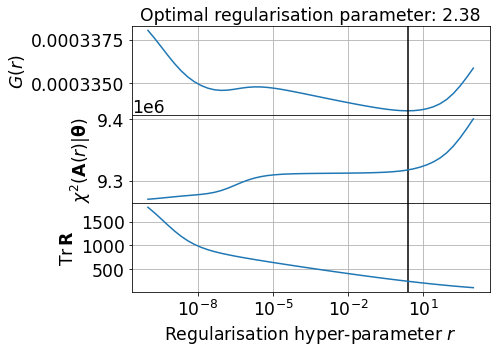

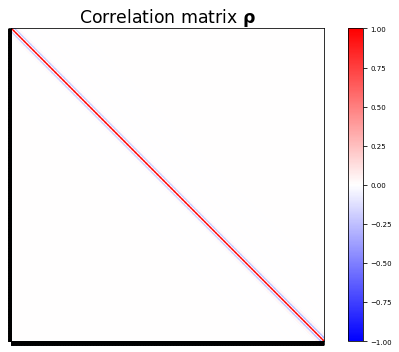

2022-05-27 17:41:18  RegFitWorkspace print_regularisation_summary INFO   
	Optimal regularisation parameter: 2.382662337360492
	Tr(R) = 238.71417315657388
	N_params = 2304
	N_data = 167402 (without mask and outliers)
2022-05-27 17:41:56  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	Sigma-clipping step 0/3 (sigma=100)
2022-05-27 17:50:52  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=9.3736e+06 initial chisq_red=55.641
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-0.01922052 -0.02884568 -0.03292461  0.01831924  0.0304404   0.05207114
  0.00356001  0.00576451  0.01061995]
	New parameters: [ 4.30419846  7.36011452 -5.63521632  9.42798537  2.58102246  4.16757653
  2.02718166  0.24242468  0.3469239 ]
	Final cost=9.3731e+06 final chisq_red=55.639 computed in 499.73s
2022-05-27 17:56:56  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=9.3731e+06 initial chisq_red=55.639
		 Line search: alph

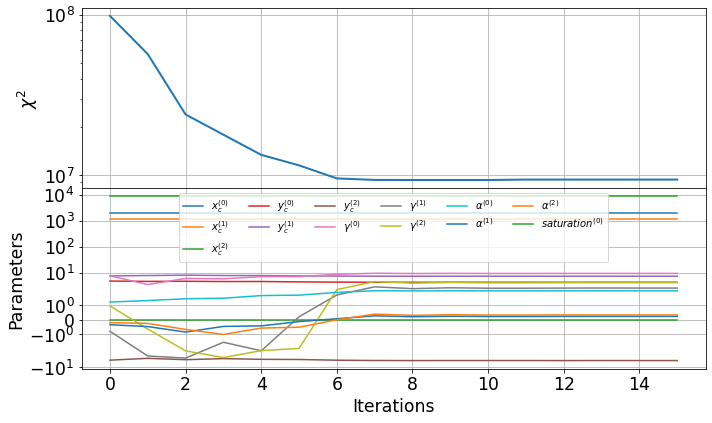

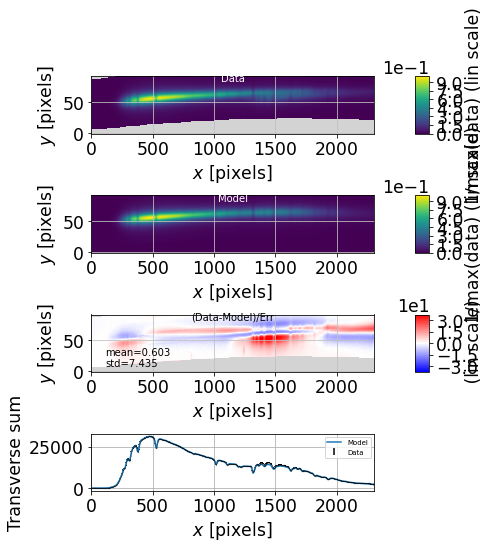

2022-05-27 18:12:07  ChromaticPSF2DFitWorkspace plot_correlation_matrix INFO   Save figure ./figures_process_holo_config_DECONVOLUTION_PSF2D/parameters_correlation.pdf.


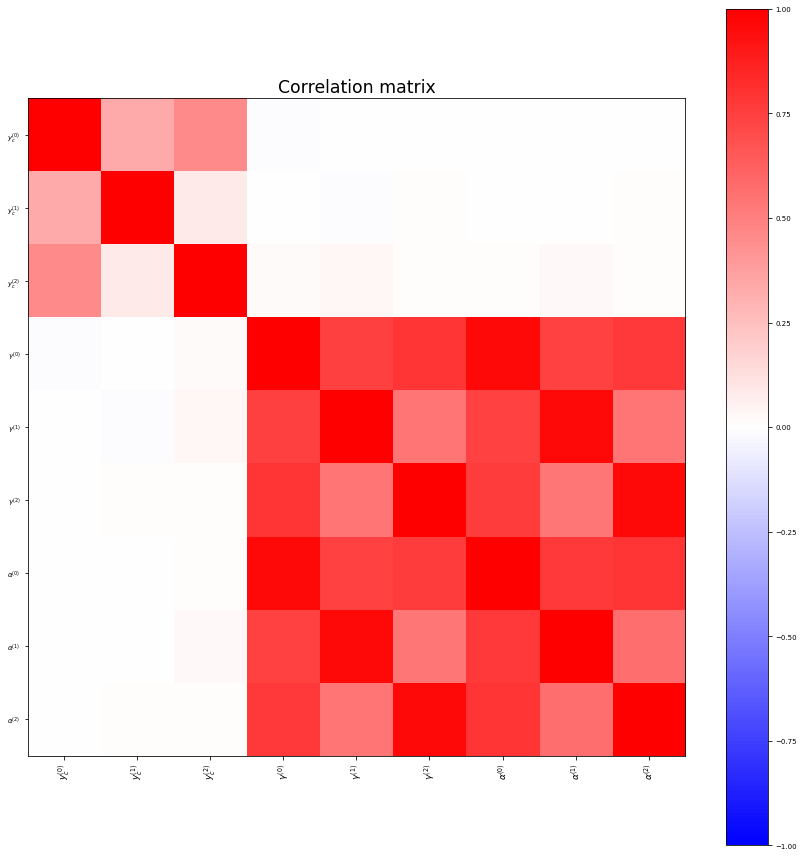

2022-05-27 18:12:08  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.


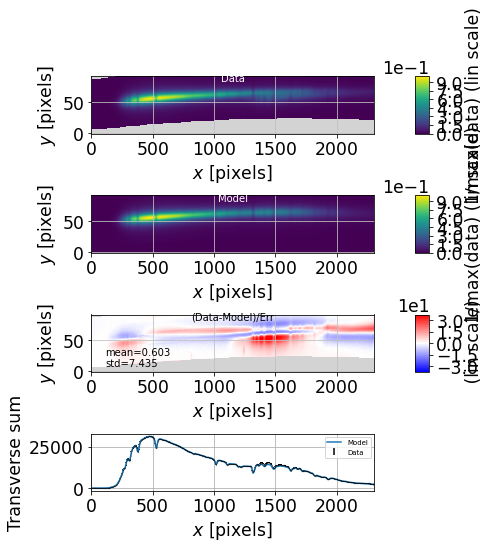

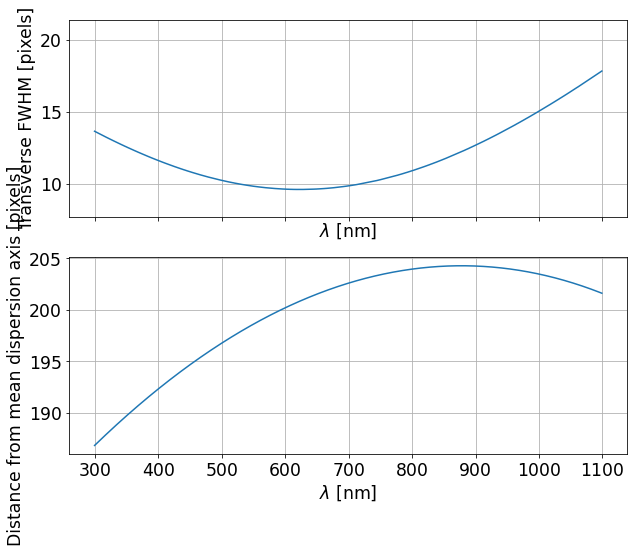

2022-05-27 18:13:58  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


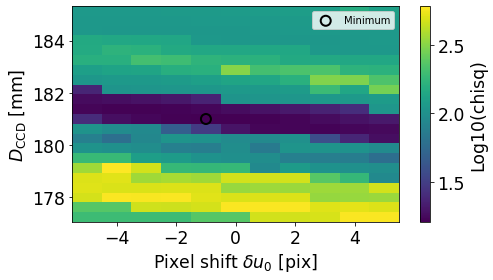

2022-05-27 18:15:34  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -0.550pix
	D = 180.971 mm (default: DISTANCE2CCD = 181.00 +/- 0.75 mm, -0.0 sigma shift)


Set header key DATE-OBS to 2022-03-17T01:59:56.544 from attr date_obs
Set header key EXPTIME to 20.0 from attr expo
Set header key AIRMASS to 1.386860919079735 from attr airmass
Set header key GRATING to holo4_003 from attr disperser_label
Set header key UNIT2 to erg/s/cm$^2$/nm from attr units
Set header key ROTANGLE to -0.28 from attr rotation_angle
Set header key DEC to -66.0397222222222 from attr dec
Set header key HA to 42.196644128114244 from attr hour_angle
Set header key OUTTEMP to 10.6 from attr temperature
Set header key OUTPRESS to 743.55 from attr pressure
Set header key OUTHUM to 44.0 from attr humidity
Set header key LBDA_REF to 640.418334412983 from attr lambda_ref
Set header key PARANGLE to 56.75888867802155 from attr parallactic_angle


2022-05-27 18:15:34  astroquery _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2022-05-27 18:15:34  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_process_holo_config_DECONVOLUTION_PSF2D/exposure_2022031600331_postisrccd_spectrum.fits
2022-05-27 18:15:35  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_process_holo_config_DECONVOLUTION_PSF2D/exposure_2022031600331_postisrccd_spectrogram.fits
2022-05-27 18:15:45  astroquery _showwarning         WARNING UnitsWarning: 'erg/s/cm$^2$/nm' did not parse as fits unit: Invalid character at col 8 If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html
2022-05-27 18:15:45  astroquery _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 

    Line    Tabulated  Detected    Shift       FWHM      Amplitude       SNR      Chisq   Eqwidth_mod Eqwidth_data
                nm        nm         nm         nm                               reduced       nm          nm     
----------- --------- --------- ----------- --------- --------------- --------- --------- ----------- ------------
  $Ca_{II}$ 393.38922 388.64713   -4.742095  4.124105  -3.8232095e-12  65.77135   3.98162   1.1061251    1.8377571
  $Ca_{II}$ 396.87042 396.73233   -0.138089  4.845725   -8.351546e-12 143.67311   3.98162   1.8550398    3.5143268
$H\epsilon$ 397.02344  402.1326    5.109172   8.32516  -1.4649262e-12 25.201382   3.98162  0.47860476     6.169317
  $H\delta$  410.2242 409.81155 -0.41265154  5.392734 -1.23430936e-11 212.34041   3.98162   2.2242327    3.5970383
   $Fe_{I}$ 430.81543  420.5198  -10.295596 14.129996  -2.5530127e-12 43.919926   3.98162   1.0844325      8.01778
  $H\gamma$  434.0256 433.71774  -0.3078668 5.1517935  -1.4176335e-11 243.87798 

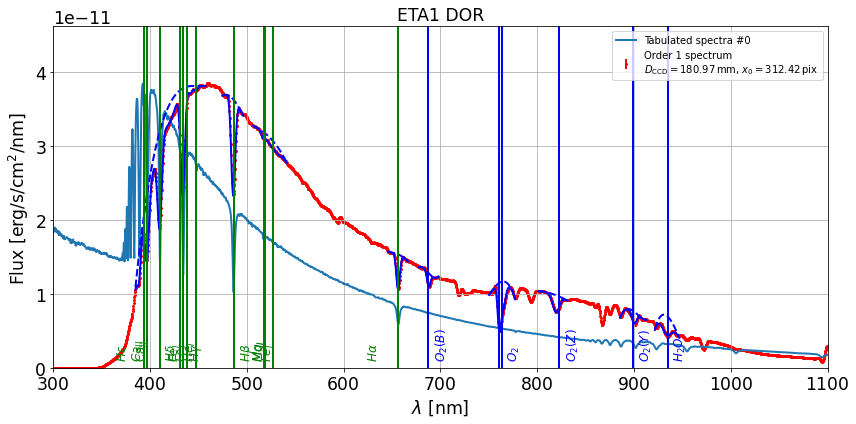

In [82]:
if FLAG_RUNWITHEXCEPTIONS:
    try:
        spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)
    except:
        errtype = sys.exc_info()[0]  # E.g. <class 'PermissionError'>
        description = sys.exc_info()[1]   # E.g. [Errno 13] Permission denied: ...
        
        print("\t +++++++++++++++++++++ Exception occured +++++++++++++++++++++++++++++++++++++++++")
        print(f"\t >>>>>  errtype = {errtype}")
        print(f"\t >>>>>> description = {description}")
else:
    spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)

# Backup output

- If no crash occurs, arrive here

./outputs_process_holo_config_DECONVOLUTION_PSF2D

In [83]:
def cleandir(path):
    if os.path.isdir(path):
        files=os.listdir(path)
        if len(files) > 0:
            for f in files:
                if os.path.isdir(os.path.join(path,f)):
                    if f==".ipynb_checkpoints":
                        shutil.rmtree(os.path.join(path,f))
                    else:
                        print(" Cannot remove this directory {}".format(os.path.join(path,f)))
                else:
                    os.remove(os.path.join(path,f))

In [84]:
# this flag must be set if one want to clean results from previous runs
if FLAG_MANAGE_OUTPUT_SPECTRACTOR:
    
    # manage global output directory of spectractor
    # Basically it has the name of the input file image
    
    if not os.path.isdir(path_toptoptopoutput_spectractor):
        os.mkdir(path_toptoptopoutput_spectractor)
    
    if not os.path.isdir(path_toptopoutput_spectractor):
        os.mkdir(path_toptopoutput_spectractor) 
        
    if configdir !="":
    # top directory    
        if not os.path.isdir(path_topoutput_spectractor):
            os.mkdir(path_topoutput_spectractor)   
            
            
        if not os.path.isdir(path_output_spectractor):
            os.mkdir(path_output_spectractor)
  
    
    if not os.path.isdir(finalpath_output_spectractor):
        os.mkdir(finalpath_output_spectractor)
        os.mkdir(os.path.join(finalpath_output_spectractor,"basespec"))
        os.mkdir(os.path.join(finalpath_output_spectractor,"plots"))
    else:
        cleandir(os.path.join(finalpath_output_spectractor,"basespec"))
        cleandir(os.path.join(finalpath_output_spectractor,"plots"))

In [85]:
print("******************************** SUCCESS ********************************************")

******************************** SUCCESS ********************************************


In [86]:
copy_tree(output_directory,os.path.join(finalpath_output_spectractor,"basespec"))

['/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_table.csv',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_lines.csv',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrogram.fits']

In [87]:
copy_tree(output_figures,os.path.join(finalpath_output_spectractor,"plots"))

['/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/plots/parameters_correlation.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/plots/fit_chromatic_psf_best_fit_noprior.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/plots/rotated_image.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/plots/extractedLines.fits',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/plots/fwhm.pdf',
 '/Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331/p

In [88]:
print("finalpath_output_spectractor = ",finalpath_output_spectractor)

finalpath_output_spectractor =  /Users/sylvie/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_PSF2D/20220316/2022031600331


In [89]:
os.listdir(os.path.join(finalpath_output_spectractor,"basespec"))

['exposure_2022031600331_postisrccd_spectrum.fits',
 'exposure_2022031600331_postisrccd_table.csv',
 'exposure_2022031600331_postisrccd_lines.csv',
 'exposure_2022031600331_postisrccd_spectrogram.fits']

In [90]:
os.listdir(os.path.join(finalpath_output_spectractor,"plots"))

['parameters_correlation.pdf',
 'fit_chromatic_psf_best_fit_noprior.pdf',
 'rotated_image.pdf',
 'extractedLines.fits',
 'fwhm.pdf',
 'fit_chromatic_psf_best_fit_psf1d.pdf',
 'order0_centroid_fit.pdf',
 'ETA1 DOR_spectrum.pdf',
 'regularisation.pdf',
 'background_extraction.pdf',
 'fwhm_2.pdf',
 'D2CCD_x0_fit.pdf',
 'amplitude_correlation_matrix.pdf',
 'intermediate_spectrum.pdf',
 'image.pdf']

In [91]:
output_directory

'./outputs_process_holo_config_DECONVOLUTION_PSF2D'

In [92]:
!ls ./outputs_process_holo_config_DECONVOLUTION_PSF2D

exposure_2022031600331_postisrccd_lines.csv
exposure_2022031600331_postisrccd_spectrogram.fits
exposure_2022031600331_postisrccd_spectrum.fits
exposure_2022031600331_postisrccd_table.csv
